***
# <font color=green size=10> ANÁLISE DESCRITIVA DE DADOS DA PNAD 2015</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

Unidade Federativa / estado do morador.


> ### Sexo	
> ***

Sexo do morador.

> ### Anos de Estudo
> ***

Nível de escolaridade

> ### Cor
> ***

Grupo étnico do morador

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
dados_pnad = pd.read_csv('dados.csv')

In [3]:
dados_pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Substituindo valores de referência

In [4]:
# Criação de dicionários com chaves sendo códigos de referência
codigo_estado = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

codigo_genero = {
    0: 'Masculino',
    1: 'Feminino'
}

codigo_escolaridade = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados/Não aplicável'
}

codigo_raca_cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}

In [5]:
# Substituindo os valores de referência das colunas:
dados_pnad['UF'] = dados_pnad['UF'].replace(codigo_estado)
dados_pnad['Sexo'] = dados_pnad['Sexo'].replace(codigo_genero)
dados_pnad['Anos de Estudo'] = dados_pnad['Anos de Estudo'].replace(codigo_escolaridade)
dados_pnad['Cor'] = dados_pnad['Cor'].replace(codigo_raca_cor)

dados_pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

In [6]:
# Variáveis / Colunas dos dados
dados_pnad.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [7]:
sorted(dados_pnad['Anos de Estudo'].unique())

['1 ano',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 'Não determinados/Não aplicável',
 'Sem instrução e menos de 1 ano']

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [8]:
dados_pnad['Cor'].unique()

array(['Parda', 'Branca', 'Preta', 'Amarela', 'Indígena'], dtype=object)

In [9]:
dados_pnad['Sexo'].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [10]:
dados_pnad['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [11]:
dados_pnad['Idade'].describe()

count    76840.000000
mean        44.071421
std         12.480583
min         13.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         99.000000
Name: Idade, dtype: float64

#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [12]:
dados_pnad['Altura'].describe()

count    76840.000000
mean         1.699512
std          0.079717
min          1.339245
25%          1.645785
50%          1.699325
75%          1.753062
max          2.028497
Name: Altura, dtype: float64

In [13]:
dados_pnad['Renda'].describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [14]:
# Calculando frequências para variável qualitativa sexo
frequencia_sexo = dados_pnad['Sexo'].value_counts()
frequencia_sexo

Sexo
Masculino    53250
Feminino     23590
Name: count, dtype: int64

In [17]:
# Calculando frequência relativa % para variável qualitativa sexo
frequencia_relativa_sexo = dados_pnad['Sexo'].value_counts(normalize=True) 

# Criando dataframe para representação de frequências
df_dist_freq_sexo = pd.DataFrame({'Frequência':frequencia_sexo,
                                  'Frequência Relativa (%)':round(frequencia_relativa_sexo,4) * 100})
df_dist_freq_sexo

,Frequência,Frequência Relativa (%)
Sexo,,
Masculino,53250,69.3
Feminino,23590,30.7


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [46]:
# Descobrindo a frequência relacionando cor e sexo
# Maneira groupby()
#quantidade_cor_sexo = dados_pnad.groupby('Sexo')['Cor'].value_counts().reset_index()
#quantidade_cor_sexo.pivot_table(values='Cor', index='Sexo', columns='Cor')

# Maneira crosstab()
frequencia_absoluta_cor_sexo = pd.crosstab(dados_pnad['Sexo'], dados_pnad['Cor'])
frequencia_absoluta_cor_sexo

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [48]:
frequencia_relativa_cor_sexo = pd.crosstab(dados_pnad['Sexo'], dados_pnad['Cor'], normalize=True) * 100
frequencia_relativa_cor_sexo

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


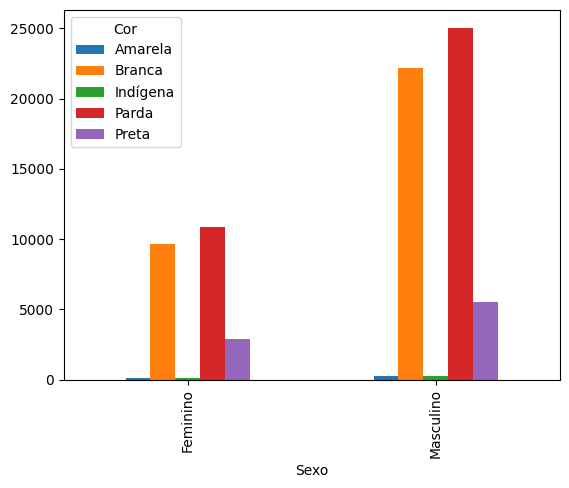

In [52]:
frequencia_absoluta_cor_sexo.plot(kind='bar');

In [68]:
# Utilizando crossby com agregação para calcular média de renda do cruzamento de dados entre cor e sexo:
media_renda_cor_sexo = pd.crosstab(dados_pnad['Sexo'], dados_pnad['Cor'], aggfunc='median', values=dados_pnad['Renda'])
media_renda_cor_sexo

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,1500.0,1200.0,788.0,800.0,800.0
Masculino,2800.0,1700.0,797.5,1200.0,1200.0


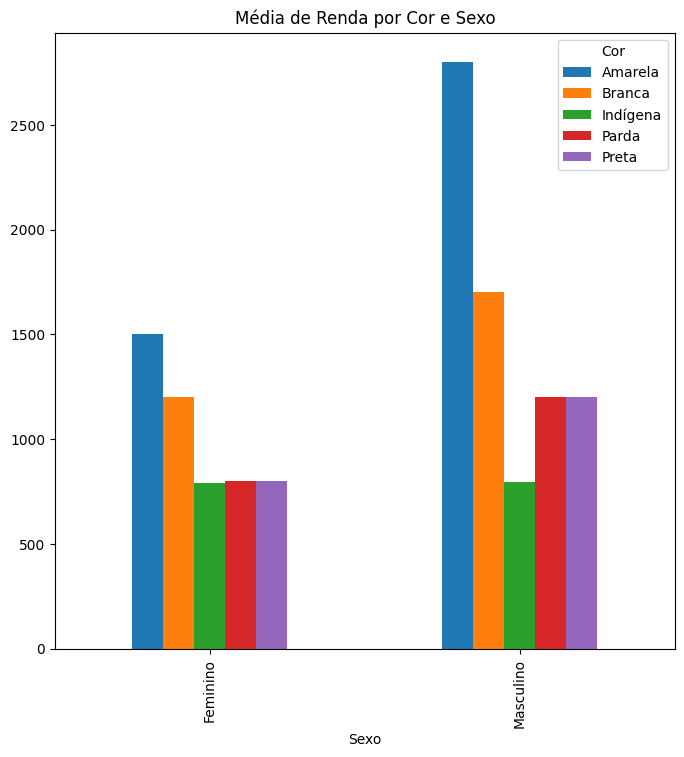

In [69]:
media_renda_cor_sexo.plot(kind='bar', figsize=(8,8), title='Média de Renda por Cor e Sexo');

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [113]:
renda_minima = dados_pnad['Renda'].min()

In [114]:
renda_maxima = dados_pnad['Renda'].max()

In [115]:
classes = [renda_minima, 1576, 3152, 7880, 15760, renda_maxima]
labels = ['Até 2SM', 'De 2 a 4 SM', 'De 4 a 10 SM', 'De 10 a 20 SM', 'Acima de 20 SM']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [116]:
# Criando coluna de classificação da renda
dados_pnad['Classificacao da Renda'] = pd.cut(x= dados_pnad['Renda'], 
                             bins= classes, 
                             labels= labels, 
                             include_lowest=True)

dados_pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classificacao da Renda
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808,Até 2SM
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790,Até 2SM
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444,Até 2SM
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158,De 4 a 10 SM
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631,Até 2SM


In [117]:
# Construindo distribuição de frequências para os intervalos definidos:
freq_abs_renda = dados_pnad['Classificacao da Renda'].value_counts()
freq_rel_renda = dados_pnad['Classificacao da Renda'].value_counts(normalize=True) * 100

dist_freq_renda = pd.DataFrame({'Frequência Absoluta':freq_abs_renda,
                                'Frequência Relativa (%)':freq_rel_renda})

dist_freq_renda

,Frequência Absoluta,Frequência Relativa (%)
Classificacao da Renda,,
Até 2SM,49755,64.751432
De 2 a 4 SM,16700,21.733472
De 4 a 10 SM,7599,9.889381
De 10 a 20 SM,2178,2.834461
Acima de 20 SM,608,0.791255


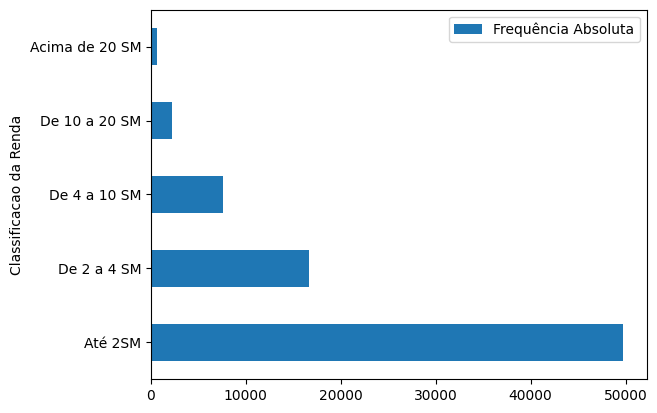

In [118]:
dist_freq_renda.reset_index().plot(y='Frequência Absoluta', x='Classificacao da Renda', kind='barh');

## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [119]:
import numpy as np

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

* A Regra de Sturges é um método empírico utilizado para determinar o número ideal de classes ou intervalos em um histograma para um conjunto de dados. É uma das várias regras de dedução empírica para criar histogramas que ajudam a interpretar a distribuição de dados.

* k é o número de classes (bins) a serem utilizadas no histograma.

* n é o número total de observações no conjunto de dados.

In [121]:
# Calculando o número de observações
n = dados_pnad.shape[0]
n

76840

In [123]:
# Calculando o valor de k e arredondando para o inteiro mais próximo
k = round(1 + (10/3) * np.log10(n), 0)
k

17.0

### Passo 2 - Criar a tabela de frequências

In [130]:
# Criando tabela de frequências diferente para renda:
freq_abs_renda_alternativa = pd.value_counts(
    pd.cut(
        x = dados_pnad['Renda'],
        bins = int(k),
        include_lowest=True
    )
)

freq_abs_renda_alternativa.reset_index().sort_values(by='Renda')

C:\Users\gabri\AppData\Local\Temp\ipykernel_61616\4123859231.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_abs_renda_alternativa = pd.value_counts(


,Renda,count
0,"(-200.001, 11764.706]",75594
1,"(11764.706, 23529.412]",1022
2,"(23529.412, 35294.118]",169
3,"(35294.118, 47058.824]",19
4,"(47058.824, 58823.529]",16
6,"(58823.529, 70588.235]",5
7,"(70588.235, 82352.941]",4
9,"(82352.941, 94117.647]",1
5,"(94117.647, 105882.353]",6
11,"(105882.353, 117647.059]",0


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

In [131]:
import seaborn as sns

1.6995124540575741

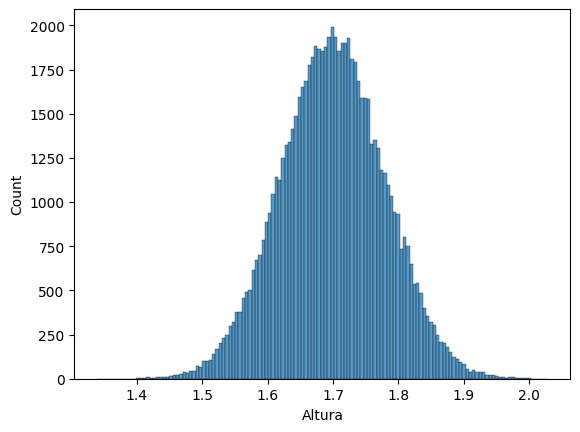

In [138]:
# Criação de histograma para distribuição de frequencias para altura
ax = sns.histplot(dados_pnad['Altura'])


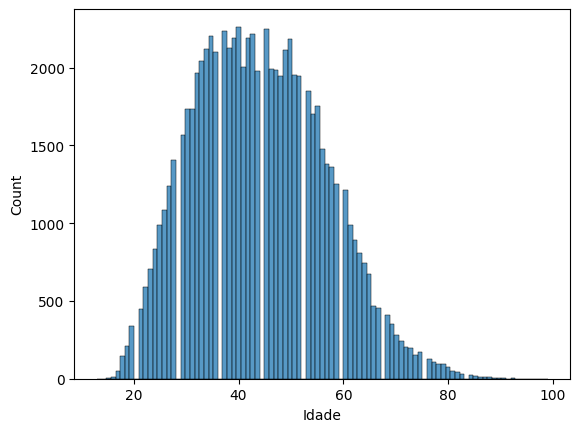

In [151]:
ax = sns.histplot(dados_pnad['Idade'])

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## DataFrame de exemplo

## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

### Obtendo a mediana em nosso dataset

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

### Obtendo a moda em nosso dataset

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

***

### Avaliando a variável ALTURA

***

### Avaliando a variável ANOS DE ESTUDO

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$